In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./Data/Fraud.csv')

In [3]:
# Starting With Data Analysis

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.shape 
# this gives (rows, columns) present

(6362620, 11)

In [6]:
df.size
# Gives total no. of different data points

69988820

In [7]:
df.head()
# First 5 transactions data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
# We identify data types, we perform this step so to identigy object-type features. So to convert 
# them into numerical form for preprocessing step before training machine learning models
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
# formatting float-point numbers 'x' to diplay up to four decimal places
pd.set_option('display.float_format', lambda x: '%0.4f' %x)

In [10]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe() .T ,2)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0000,243.4000,142.3300,1.0000,156.0000,239.0000,335.0000,743.0000
amount,6362620.0000,179861.9000,603858.2300,0.0000,13389.5700,74871.9400,208721.4800,92445516.6400
oldbalanceOrg,6362620.0000,833883.1000,2888242.6700,0.0000,0.0000,14208.0000,107315.1800,59585040.3700
newbalanceOrig,6362620.0000,855113.6700,2924048.5000,0.0000,0.0000,0.0000,144258.4100,49585040.3700
oldbalanceDest,6362620.0000,1100701.6700,3399180.1100,0.0000,0.0000,132705.6600,943036.7100,356015889.3500
newbalanceDest,6362620.0000,1224996.4000,3674128.9400,0.0000,0.0000,214661.4400,1111909.2500,356179278.9200


In [11]:
# Understanding relationship b/w input features and target features to select the important
# features for training machine learning model

df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud', 'isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.0000,0.0224,-0.0101,-0.0103,0.0277,0.0259,0.0316,0.0033
amount,0.0224,1.0000,-0.0028,-0.0079,0.2941,0.4593,0.0767,0.0123
oldbalanceOrg,-0.0101,-0.0028,1.0000,0.9988,0.0662,0.0420,0.0102,0.0038
newbalanceOrig,-0.0103,-0.0079,0.9988,1.0000,0.0678,0.0418,-0.0081,0.0038
oldbalanceDest,0.0277,0.2941,0.0662,0.0678,1.0000,0.9766,-0.0059,-0.0005
newbalanceDest,0.0259,0.4593,0.0420,0.0418,0.9766,1.0000,0.0005,-0.0005
isFraud,0.0316,0.0767,0.0102,-0.0081,-0.0059,0.0005,1.0000,0.0441
isFlaggedFraud,0.0033,0.0123,0.0038,0.0038,-0.0005,-0.0005,0.0441,1.0000


In [12]:
# What we observed in above correlation matrix, is that ('oldbalanceDest', 'newbalanceDest') and 
# ('oldbalanceOrg', 'newbalanceOrg') indicates a high correlation (near to 1) or linear dependency between
# these pairs of features. And this could lead to issues in regression model.

# So, to fix this we need to remove one of the highly correated variables from each pair. 

In [13]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0000,C1510987794,0.0000,0.0000,C1696624817,0.0000,0.0000,1,0
3247298,250,CASH_OUT,0.0000,C521393327,0.0000,0.0000,C480398193,0.0000,0.0000,1,0
3760289,279,CASH_OUT,0.0000,C539112012,0.0000,0.0000,C1106468520,538547.6300,538547.6300,1,0
5563714,387,CASH_OUT,0.0000,C1294472700,0.0000,0.0000,C1325541393,7970766.5700,7970766.5700,1,0
5996408,425,CASH_OUT,0.0000,C832555372,0.0000,0.0000,C1462759334,76759.9000,76759.9000,1,0
5996410,425,CASH_OUT,0.0000,C69493310,0.0000,0.0000,C719711728,2921531.3400,2921531.3400,1,0
6168500,554,CASH_OUT,0.0000,C10965156,0.0000,0.0000,C1493336195,230289.6600,230289.6600,1,0
6205440,586,CASH_OUT,0.0000,C1303719003,0.0000,0.0000,C900608348,1328472.8600,1328472.8600,1,0
6266414,617,CASH_OUT,0.0000,C1971175979,0.0000,0.0000,C1352345416,0.0000,0.0000,1,0
6281483,646,CASH_OUT,0.0000,C2060908932,0.0000,0.0000,C1587892888,0.0000,0.0000,1,0


In [14]:
# Observation: Transactions which have 'amount'=0 are probably fraud transactions. We can also understand this thing as,
# if someone having 0 balance in their account, then their is no sense to transfer money. That is, probably some
# fraudster is targeting random accounts, and may be they are not aware about account balance.

In [15]:
df[df['isFlaggedFraud']==1]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.0800,C728984460,4953893.0800,4953893.0800,C639921569,0.0000,0.0000,1,1
3247297,250,TRANSFER,1343002.0800,C1100582606,1343002.0800,1343002.0800,C1147517658,0.0000,0.0000,1,1
3760288,279,TRANSFER,536624.4100,C1035541766,536624.4100,536624.4100,C1100697970,0.0000,0.0000,1,1
5563713,387,TRANSFER,4892193.0900,C908544136,4892193.0900,4892193.0900,C891140444,0.0000,0.0000,1,1
5996407,425,TRANSFER,10000000.0000,C689608084,19585040.3700,19585040.3700,C1392803603,0.0000,0.0000,1,1
5996409,425,TRANSFER,9585040.3700,C452586515,19585040.3700,19585040.3700,C1109166882,0.0000,0.0000,1,1
6168499,554,TRANSFER,3576297.1000,C193696150,3576297.1000,3576297.1000,C484597480,0.0000,0.0000,1,1
6205439,586,TRANSFER,353874.2200,C1684585475,353874.2200,353874.2200,C1770418982,0.0000,0.0000,1,1
6266413,617,TRANSFER,2542664.2700,C786455622,2542664.2700,2542664.2700,C661958277,0.0000,0.0000,1,1
6281482,646,TRANSFER,10000000.0000,C19004745,10399045.0800,10399045.0800,C1806199534,0.0000,0.0000,1,1


In [16]:
# Observation: Transactions which are flag fraud by the system are actually fraud transactions

In [17]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


In [18]:
# Observation: If transaction amount is same as amount present before transaction happended then the transaction 
# is basically a fraudulent transaction. Basically, we can say fraudsters know in this case that how much money is 
# present in the account of the victim and they directly clean the whole money from the account.

In [19]:
# ---Data Preprocessing---
# 1. Checking null values in our dataframe
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [20]:
# obv: no null values present

In [21]:
# 2. checking for duplicate values
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [22]:
df.duplicated().sum()

0

In [23]:
# Checking if the data is balanced or not
# will count unique values in 'isFraud' column of our df
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [24]:
# obsv: Data is highly unbalanced, this could basically lead to biased models that surely will perform well
# for one outcome and not so well for the rare event outcome

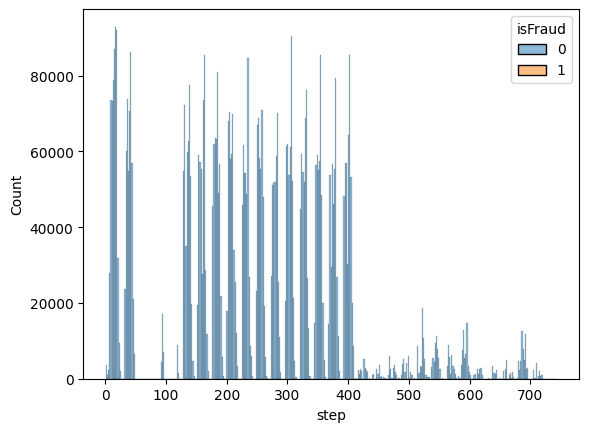

In [25]:
# Dat visualization 
sns.histplot(x='step', data=df, hue='isFraud');

In [26]:
# Obsv: Nothing such insightful info we received for fraud transaction. But one insight
# we got from this is that most of the transactions occured before 400 step time unit
# where 1 time unit = 1 hr

<Axes: xlabel='amount'>

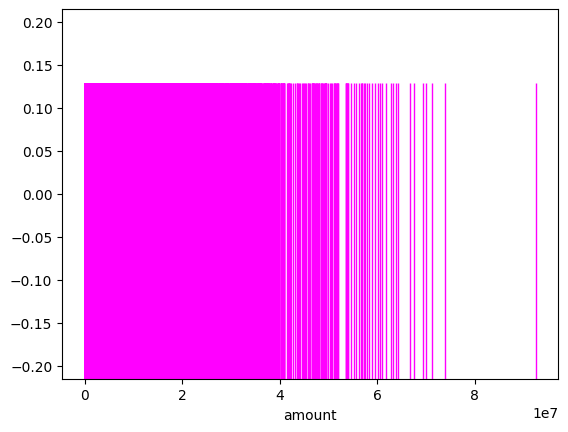

In [27]:
sns.rugplot(x='amount', data=df, height=0.8, color='magenta')

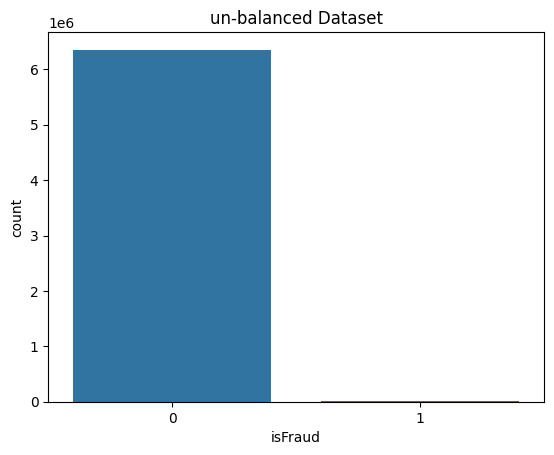

In [28]:
sns.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

In [29]:
# obsv: from countplot we can say that data set is highly unbalanced .......we need to balance this dataset to prevent biasing in
# trained model. Second obsv from the rug plot is that very few transactions are done with large amount of money. Those could be possibly
# fraudulent transactions done by fraudsters

In [30]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

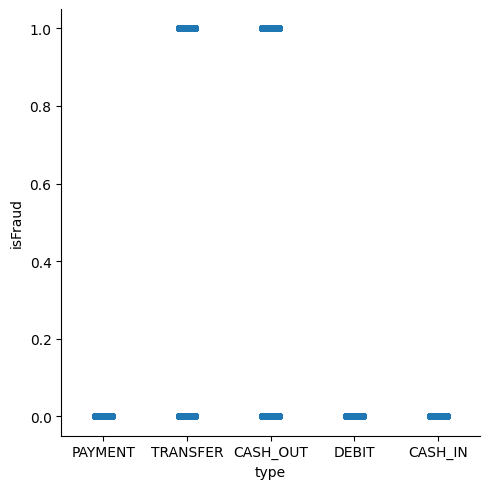

In [31]:
# Visualizing relationship b/w types of transaction and fraudulent and non fraudulent transaction 
# We are basically doing this to figure out what type of transactions are carried out by fraudsters
sns.catplot(data=df, x="type", y="isFraud")

In [32]:
# obsv: most fraud transactions are one in money is transferring from one account to another or in which
# physicall cash is withdrawn

In [33]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
681,1,CASH_OUT,20128.0000,C1118430673,20128.0000,0.0000,C339924917,6268.0000,12145.8500,1,0
724,1,CASH_OUT,416001.3300,C749981943,0.0000,0.0000,C667346055,102.0000,9291619.6200,1,0
970,1,CASH_OUT,1277212.7700,C467632528,1277212.7700,0.0000,C716083600,0.0000,2444985.1900,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.9900,C994950684,63416.9900,0.0000,C1662241365,276433.1800,339850.1700,1,0
6362613,743,CASH_OUT,1258818.8200,C1436118706,1258818.8200,0.0000,C1240760502,503464.5000,1762283.3300,1,0
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0


In [34]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
969,1,TRANSFER,1277212.7700,C1334405552,1277212.7700,0.0000,C431687661,0.0000,0.0000,1,0
1115,1,TRANSFER,35063.6300,C1364127192,35063.6300,0.0000,C1136419747,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.9900,C778071008,63416.9900,0.0000,C1812552860,0.0000,0.0000,1,0
6362612,743,TRANSFER,1258818.8200,C1531301470,1258818.8200,0.0000,C1470998563,0.0000,0.0000,1,0
6362614,743,TRANSFER,339682.1300,C2013999242,339682.1300,0.0000,C1850423904,0.0000,0.0000,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0


In [35]:
# Obsv : Fraudsters are using cash_out and transfer type of trans for carrying out almost 100 percent of frauds

In [36]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

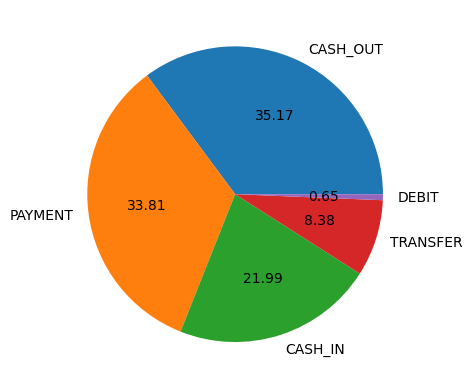

In [37]:
plt.pie(x = df['type'].value_counts(), autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

In [38]:
# Obsv: THe two major type of transactions cash_out and payment are probably might have been the best way for fraudsters to
# target as most of the transaction are of these types

In [39]:
df.loc[(df['type']=="Payment") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [40]:
# Although, in the dataset I have no fraud transaction is noticed by payment method

In [41]:
# Finding outliers using interquartile range (IQR) method

In [42]:
Q1 = df['step'].quantile(0.25)
Q3 = df['step'].quantile(0.75)
iqr = Q3 - Q1
up_limit = Q3 + (1.5 * iqr)
low_limit = Q1 - (1.5 * iqr)

print("upper limit: ", up_limit)
print("lower limit: ", low_limit)


upper limit:  603.5
lower limit:  -112.5


In [43]:
# This is the range of step ( unit of time ) below this range lower limit and above this 
# range upper limit outliers lies

In [44]:
df[df['step']>603.5]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.4800,C454938739,714218.4800,0.0000,C482986731,0.0000,0.0000,1,0
6259933,604,CASH_OUT,714218.4800,C1835708623,714218.4800,0.0000,C1881116283,106940.8300,821159.3100,1,0
6259934,604,TRANSFER,277582.5300,C2144116571,277582.5300,0.0000,C570246252,0.0000,0.0000,1,0
6259935,604,CASH_OUT,277582.5300,C1512896686,277582.5300,0.0000,C731882373,0.0000,277582.5300,1,0
6259936,604,TRANSFER,4672401.0400,C801580496,4672401.0400,0.0000,C1917884973,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


In [45]:
# # As per this record we can see around 102K outliers in 'step' feature.
# But, other important features such as transaction amount and everything other are more 
# important features and should be taken in consideration while finding outliers. 
# So, we can't decide only on this basis as large no. of transactions is coming in outliers

In [46]:
# Selecting useful features and removing features which are not so imp. in model training. 
# Let's trying to figure out coorelation between input features and target features
# using heatmap

# annot is set to True, so that the values of the correlation coefficients will be annotated, or displayed, on the heatmap.

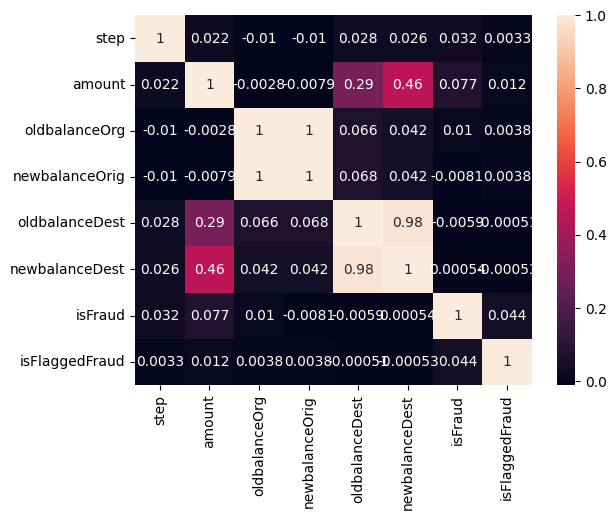

In [47]:
sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(), annot=True)
plt.show()


In [48]:
#  obsv.: ('oldbalanceDest', 'newbalanceDest') and ('oldbalanceOrg', 'newbalanceOrg') indicates a high correlation (near to 1) or linear dependency between
#  these pairs of features. And this could lead to issues in regression model.

#  So, to fix this we need to remove one of the highly correated variables from each pair. 

#  Best option is to remove 'newbalanceOrig' and 'newbalanceDest', becuase they are less correlated with dependent
#  feature ( "isFraud"), as compare to other two one.

In [49]:
df = df.drop(['newbalanceOrig', 'newbalanceDest'], axis=1)

In [50]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,C1231006815,170136.0000,M1979787155,0.0000,0,0
1,1,PAYMENT,1864.2800,C1666544295,21249.0000,M2044282225,0.0000,0,0
2,1,TRANSFER,181.0000,C1305486145,181.0000,C553264065,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,C38997010,21182.0000,1,0
4,1,PAYMENT,11668.1400,C2048537720,41554.0000,M1230701703,0.0000,0,0


In [51]:
# Checking variations of data in features for feature selection 

In [52]:
from sklearn.feature_selection import VarianceThreshold
# threshold = 0 (no variation)
# threshold = 1 (small variation)
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()
#threshold = 1
Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

In [53]:
# NOTICE: The 'isFlaggedFraud' feature has low variation in data, but we cannot remove this column. It contains two values (0,1) crucial for identifying fraudulent transactions. Moreover, it exhibits a strong correlation with the target feature, making its removal an unfavorable option.


In [54]:
#checking if features are useful or not
# NOTICED:- we have 3 categorical features "type" , "nameOrig" , "nameDest"

In [55]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())
# type having these unique values :-  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 type having these unique values :- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [56]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [57]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [58]:
df=df.drop({'nameOrig','nameDest'},axis=1)

In [59]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,170136.0000,0.0000,0,0
1,1,PAYMENT,1864.2800,21249.0000,0.0000,0,0
2,1,TRANSFER,181.0000,181.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,181.0000,21182.0000,1,0
4,1,PAYMENT,11668.1400,41554.0000,0.0000,0,0


In [60]:
# feature encoding
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [61]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [62]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [63]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
4,1,4,11668.1400,41554.0000,0.0000,0,0


In [64]:
df["type"].unique()

array([4, 2, 5, 1, 3], dtype=int64)

In [65]:
df["type"].value_counts()

type
5    2237500
4    2151495
3    1399284
2     532909
1      41432
Name: count, dtype: int64

In [66]:
#handling unbalance data
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [67]:
# we are creating 2 DataFrame ,one contain fraud transaction and another one contain genuine transaction
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]
normal_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
4,1,4,11668.1400,41554.0000,0.0000,0,0
5,1,4,7817.7100,53860.0000,0.0000,0,0
6,1,4,7107.7700,183195.0000,0.0000,0,0


In [68]:
fraud_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
251,1,2,2806.0000,2806.0000,0.0000,1,0
252,1,5,2806.0000,2806.0000,26202.0000,1,0
680,1,2,20128.0000,20128.0000,0.0000,1,0


In [69]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 7)
(8213, 7)


In [70]:
# taking random 8213 records from normal transaction
normal_transaction=normal_transaction.sample(n=8213)
# here we have 50% fraud transactions and 50% normal transactions.
print(normal_transaction.shape)
print(fraud_transaction.shape)

(8213, 7)
(8213, 7)


In [71]:
normal_transaction['amount'].describe()
# mean of normal transaction is less than fraud transaction

count       8213.0000
mean      169304.0258
std       403927.3737
min            7.8200
25%        13255.1300
50%        77248.2800
75%       209632.2600
max     14065264.1300
Name: amount, dtype: float64

In [72]:
fraud_transaction['amount'].describe()

count       8213.0000
mean     1467967.2991
std      2404252.9472
min            0.0000
25%       127091.3300
50%       441423.4400
75%      1517771.4800
max     10000000.0000
Name: amount, dtype: float64

In [73]:
#mean of fraud transaction is higher. 

In [74]:
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)
new_df.head()
# Concatenating these two datasets along rows (axis=0) to address the issue of an unbalanced dataset.


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
472918,19,5,231577.7400,7080.0000,998943.8700,0,0
6105819,525,5,17189.3700,0.0000,1108449.4700,0,0
165381,12,4,7410.7200,0.0000,0.0000,0,0
4814916,346,5,118046.3900,70420.0000,89633.8600,0,0
2185320,185,4,7171.3100,13983.0000,0.0000,0,0


In [75]:
new_df.tail()


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6362615,743,5,339682.1300,339682.1300,0.0000,1,0
6362616,743,2,6311409.2800,6311409.2800,0.0000,1,0
6362617,743,5,6311409.2800,6311409.2800,68488.8400,1,0
6362618,743,2,850002.5200,850002.5200,0.0000,1,0
6362619,743,5,850002.5200,850002.5200,6510099.1100,1,0


In [76]:
# Here fraud transaction dataset is added to normal transaction dataset

In [77]:
new_df.shape

(16426, 7)

In [78]:
# train-test split

# independent feature
X=new_df.drop("isFraud",axis=1)
# dependent feature
y=new_df["isFraud"]

X.shape
y.shape

(16426,)

In [79]:
from sklearn.model_selection import train_test_split
# Using 'stratify' ensures even distribution of data values, promoting balanced representation in the dataset.

x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (13140, 6)
x-test :-   (3286, 6)
y-train :-  (13140,)
y-test :-   (3286,)


In [80]:
y_test.value_counts()

isFraud
0    1643
1    1643
Name: count, dtype: int64

In [81]:
y_train.value_counts()

isFraud
1    6570
0    6570
Name: count, dtype: int64

In [82]:
# Now isFraud values are equally distributed.

In [83]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [84]:
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)
x_train_scaler

array([[-0.58767215, -1.33592712, -0.38409102, -0.3435956 , -0.2316703 ,
        -0.0302337 ],
       [-0.29892614, -1.33592712, -0.29818084, -0.29384626, -0.2316703 ,
        -0.0302337 ],
       [ 1.94916786,  0.99384846,  4.99314508,  2.7702844 , -0.2154281 ,
        -0.0302337 ],
       ...,
       [ 0.49512541,  0.99384846, -0.32267579, -0.35644677, -0.20147634,
        -0.0302337 ],
       [ 0.38684566,  0.99384846,  0.3511866 ,  0.08219308, -0.2316703 ,
        -0.0302337 ],
       [ 0.83543322,  0.99384846,  1.95674307,  1.01194771, -0.17722237,
        -0.0302337 ]])

In [85]:
x_test_scaler

array([[ 0.24247265, -0.55933526, -0.35188365,  1.64317262,  0.36806456,
        -0.0302337 ],
       [ 1.49026794, -0.55933526, -0.43213368,  0.84418402, -0.11328459,
        -0.0302337 ],
       [ 0.2063794 ,  0.99384846, -0.29424612, -0.35604426,  0.17460793,
        -0.0302337 ],
       ...,
       [-0.77845077,  0.2172566 , -0.43240023, -0.3792716 , -0.2316703 ,
        -0.0302337 ],
       [-1.52094053,  0.99384846, -0.42269094, -0.3792716 ,  0.34669212,
        -0.0302337 ],
       [-1.3095372 ,  0.99384846, -0.39177819, -0.34804713, -0.223348  ,
        -0.0302337 ]])

In [86]:
# Training and evaluating model
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train_scaler,y_train)

LogisticRegression()

In [87]:
y_pred=log_model.predict(x_test_scaler)
# for accuracy we will check

from sklearn.metrics import accuracy_score
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
77.3889227023737
- - - - - - - - - - -


In [88]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_model=RandomForestClassifier()
rand_model.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [89]:
y_pred=rand_model.predict(x_test_scaler)
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
97.93061472915399
- - - - - - - - - - -


In [90]:
# Support Vector Machine(SVM)
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train_scaler,y_train)

SVC()

In [91]:
y_pred=svm_model.predict(x_test_scaler)
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
88.74010955569081
- - - - - - - - - - -


In [92]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb_model=BernoulliNB()
bnb_model.fit(x_train_scaler,y_train)

BernoulliNB()

In [93]:
y_pred=bnb_model.predict(x_test_scaler)
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
69.20267802799756
- - - - - - - - - - -


In [94]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(x_train_scaler,y_train)

GaussianNB()

In [95]:
y_pred=gnb_model.predict(x_test_scaler)
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
58.642726719415705
- - - - - - - - - - -


In [96]:
# Conclusion:- Random Forest Classifier Selected, because it has the best accuracy.

In [97]:
import pickle

In [98]:
pickle.dump(rand_model,open('model.sav','wb'))

In [99]:
rand_model=pickle.load(open('model.sav','rb'))

In [101]:
pickle.dump(scaler,open('scaler.sav','wb'))

In [102]:
rand_model=pickle.load(open('model.sav','rb'))

In [103]:
new_scaler=pickle.load(open('scaler.sav','rb'))

In [104]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
472918,19,5,231577.7400,7080.0000,998943.8700,0,0
6105819,525,5,17189.3700,0.0000,1108449.4700,0,0
165381,12,4,7410.7200,0.0000,0.0000,0,0
4814916,346,5,118046.3900,70420.0000,89633.8600,0,0
2185320,185,4,7171.3100,13983.0000,0.0000,0,0


In [105]:
input_array=np.array([[228,5,117563.1100,0.0000,208908.4100,0]])
input_array

array([[2.2800000e+02, 5.0000000e+00, 1.1756311e+05, 0.0000000e+00,
        2.0890841e+05, 0.0000000e+00]])

In [106]:
input_array_scale=new_scaler.transform(input_array)
input_array_scale

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.40720589,  0.99384846, -0.38175775, -0.3792716 , -0.17123212,
        -0.0302337 ]])

In [107]:
pred=rand_model.predict(input_array_scale)
pred

array([0], dtype=int64)